In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df3 = pd.read_csv('./car data/Car details v3.csv')

In [3]:
df3.dropna(axis=0,inplace=True)

df3['engine'] = (df3['engine'].astype(str).apply(lambda x:x.split(' ')[0])).astype(np.int32)
df3['mileage'] = (df3['mileage'].astype(str).apply(lambda x:x.split(' ')[0])).astype(np.float32)
df3['max_power'] = (df3['max_power'].astype(str).apply(lambda x:x.split(' ')[0])).astype(np.float32)
df3['transmission'] = (df3['transmission'].map({'Manual':1, 'Automatic':2})).astype(np.int32)
df3['fuel'] = (df3['fuel'].map({'Diesel':4, 'Petrol':3, 'LPG':2, 'CNG':1})).astype(np.int32)
df3['owner'] = (df3['owner'].map({'First Owner':1, 'Second Owner':2, 'Third Owner':3,'Fourth & Above Owner':4, 'Test Drive Car':0})).astype(np.int32)
df3['year_used'] = 2022 - df3['year']
df3['seller_type'] = df3['seller_type'].map({'Individual':1, 'Dealer':2, 'Trustmark Dealer':3})
df3['selling_price'] = df3['selling_price']/100000
df3['km_driven'] = df3['km_driven']/1000
df3['seats'] = df3['seats'].astype(np.int32)

df3.drop(['torque','name','year'],axis=1,inplace=True)

In [4]:
df3.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_used
0,4.50,145.5,4,1,1,1,23.400000,1248,74.000000,5,8
1,3.70,120.0,4,1,1,2,21.139999,1498,103.519997,5,8
2,1.58,140.0,3,1,1,3,17.700001,1497,78.000000,5,16
3,2.25,127.0,4,1,1,1,23.000000,1396,90.000000,5,12
4,1.30,120.0,3,1,1,1,16.100000,1298,88.199997,5,15


In [5]:
X = df3[['km_driven', 'fuel', 'transmission', 'owner','seller_type','mileage', 'engine', 'max_power', 'seats', 'year_used']]
y=df3['selling_price']

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
for i in range(len(model.feature_importances_)):
    print(f'column-{df3.columns[i]} ,importance = {model.feature_importances_[i]} ')

column-selling_price ,importance = 0.046636525732834895 
column-km_driven ,importance = 0.05025669046108318 
column-fuel ,importance = 0.2941616647872465 
column-seller_type ,importance = 0.012071743021709883 
column-transmission ,importance = 0.025112464097672482 
column-owner ,importance = 0.025181596403760834 
column-mileage ,importance = 0.07943083139734033 
column-engine ,importance = 0.3027145091442726 
column-max_power ,importance = 0.012125430189047352 
column-seats ,importance = 0.15230854476503186 


In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=20)]
max_features = ['auto' , 'sqrt']
max_depth = [int(x) for x in np.linspace(5,50,num=10)]
min_samples_split = [2,5,10,15,50,75,100]
min_samples_leaf = [1,2,5,10,15,20]

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42 , n_jobs=1)


In [10]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=15, min_samples_split=75, n_estimators=1600; total time=  10.3s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=15, min_samples_split=75, n_estimators=1600; total time=  10.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=15, min_samples_split=75, n_estimators=1600; total time=  10.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=15, min_samples_split=75, n_estimators=1600; total time=   9.9s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=15, min_samples_split=75, n_estimators=1600; total time=  10.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              75, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                      

C:\Users\saran\anaconda3\envs\car_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

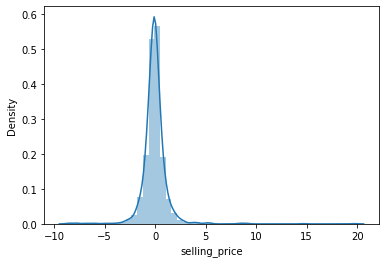

In [13]:
prediction = rf_random.predict(X_test)
sns.distplot(y_test-prediction)

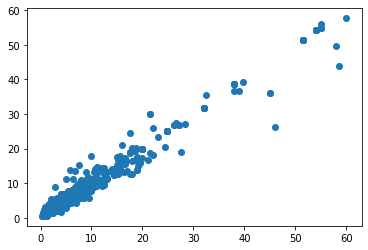

In [14]:
plt.scatter(y_test,prediction)

In [15]:
file = open('rf_reg_model.pkl' , 'wb')
pickle.dump(rf_random,file)